In [1]:
print("radhe radhe")

radhe radhe


## initialize all and all impotent thing must run    

In [ ]:
import pandas as pd
from regex import P

class TemperatureDataTransformer:
    def __init__(self, data):
        """
        Initialize the class with the wide-format data.
        """
        self.df_wide = pd.DataFrame(data)

    def wide_to_long(self):
        """
        Transform the wide-format data into long format.
        """
        df_long = self.df_wide.melt(id_vars=['Year'], var_name='Month', value_name='Temperature')
        df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + '-' + df_long['Month'] + '-01')
        df_long = df_long.set_index('Date')[['Temperature']]
        df_long=df_long.sort_index()
        return df_long

    def long_to_wide(self, df_long,col):
        """
        Transform the long-format data back into wide format.
        """
        df_long = df_long.reset_index()
        
        # print(df_long)
        df_long['Year'] = df_long['Date'].dt.year
        # print(df_long['Year'])
        df_long['Index'] = df_long['Date'].dt.month_name().str[:3]
        # print(df_long['Index'])
        df_wide = df_long.pivot(index='Year', columns='Index', values=col)
        # print(df_wide)
        # Reorder columns to match the original format
        month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        df_wide = df_wide[month_order]
        # print(df_wide)
        # print(df_wide.reset_index())
        return df_wide.reset_index()


In [36]:



def plot_fig(data, inverted= False, title="",y_label ="",width=0.15,seasons={},lable_data="",l_y_pos=0.9,l_font_size=10,l_color='darkblue',ylim=[0,1.3]):
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    # Assuming your data is loaded into a DataFrame called df
    # If you haven't loaded it yet, load using:
    # df = pd.read_csv("your_file.csv", index_col=0)

    # Transpose for better plotting
    df = data # Columns become model, rows become districts
    if inverted:
        df = 1/df  # Invert the values for better visualization (if needed)

        df = (df - df.min().min()) / (df.max().max() - df.min().min())

    # Plotting
    x = np.arange(len(df.index))  # Number of districts
    width = width # Width of each bar
    model = df.columns

    plt.figure(figsize=(16, 6))

    # Create bar for each model
    for i, model in enumerate(model):
        plt.bar(x + i * width, df[model], width=width, label=model)
        
    y_pos = l_y_pos
    for s,data in seasons.items():
        
        plt.figtext(0.05, y_pos, f"{s} -> {data} -" ,
                fontsize=l_font_size, color=l_color, ha='left')
        y_pos -= 0.035  # Adjust the position for the next season text

    plt.xticks(x + width * 3, df.index, rotation=90)
    plt.ylabel(y_label)
    plt.title(title)
    plt.ylim(ylim[0], ylim[1])
    plt.legend()
    plt.tight_layout()
    plt.show()

In [35]:
from dotenv import load_dotenv
import os

load_dotenv()

# IMPORT DATASET PATH
DATASET_PATH= os.getenv("DATASET_PATH")
import pandas as pd
df=pd.read_csv(DATASET_PATH,index_col="Date",parse_dates=["Date"],dayfirst=False)

import datetime
from dateutil.relativedelta import relativedelta  # Import relativedelta

# Define the train end date
# Define the train end date
# train_end_date = datetime.datetime(1997, 12, 1)
train_end_date = datetime.datetime(1992, 12, 1)

# Calculate the test start date by adding 1 month
test_start = train_end_date + relativedelta(months=1)
train_data=df[:train_end_date]
test_data=df[test_start:]



import os
import pandas as pd

data_path = os.getenv("output_10_year")
data = {}

for root, dirs, files in os.walk(data_path):
    for f in files:
        if f.endswith('.csv'):
            path = os.path.join(root, f)
            print(path,f.removesuffix(".csv"))
            df = pd.read_csv(path,index_col="Date",parse_dates=["Date"],dayfirst=False)
            data[f.removesuffix(".csv")] = df  

rolling_predictions_window_12=data["rolling_predictions_window_12"]
sarima_no_mod=data["predict_result_no_mod"]
rolling_predictions_window_1=data["rolling_predictions_window_1"]
sarima_result_exog_pred=data["sarima_result_exog_pred"]
lstm_pred_data=data["lstm_pred_data"]

models = {
    "rolling_predictions_window_12": rolling_predictions_window_12,
    "sarima_no_mod": sarima_no_mod,
    "rolling_predictions_window_1": rolling_predictions_window_1,
    "sarima_result_exog_pred": sarima_result_exog_pred,
    "lstm_pred_data": lstm_pred_data
}

test_data_len=len(test_data)/12
test_data_len=int(test_data_len)
test_data_len

/home/radhe/Subha/internship/werather_forcastiing/result/output_10_year/rolling_predictions_window_12.csv rolling_predictions_window_12
/home/radhe/Subha/internship/werather_forcastiing/result/output_10_year/predict_result_no_mod.csv predict_result_no_mod
/home/radhe/Subha/internship/werather_forcastiing/result/output_10_year/rolling_predictions_window_1.csv rolling_predictions_window_1
/home/radhe/Subha/internship/werather_forcastiing/result/output_10_year/sarima_result_exog_pred.csv sarima_result_exog_pred
/home/radhe/Subha/internship/werather_forcastiing/result/output_10_year/lstm_pred_data.csv lstm_pred_data


10

 ## prediction month wise 

In [15]:
import numpy as np
# from sklearn.metrics import mean_squared_error


def mean_squared_error(y_true, y_pred):
    """
    Calculate the mean squared error between two sets of predictions.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the root mean squared error between two sets of predictions.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

def find_rmse(y_true, y_pred):
    r2_val={}
    for col in y_true:
        r2_val[col]=root_mean_squared_error(y_true[col], y_pred[col])
    return r2_val
rmse_value_months={}
for model_name, model_data in models.items():
    print(f"Model: {model_name}")
    rmse_months={}
    for col in test_data.columns:
        tem=TemperatureDataTransformer(test_data)
        f1=tem.long_to_wide(test_data[col],col)
        f1.drop(columns=["Year"], inplace=True)
        tem=TemperatureDataTransformer(model_data)
        f2=tem.long_to_wide(model_data[col],col)
        f2.drop(columns=["Year"], inplace=True)
        rmse = find_rmse(f1, f2)
        rmse_months[col]=rmse
    rmse_value_months[model_name]=rmse_months
    
# print(rmse_value_months)
import json
rmse_path = os.path.join(data_path, "rmse_value_months.json")
with open(rmse_path, "w") as f:
    json.dump(rmse_value_months, f, indent=4)

with open(rmse_path, "r") as f:
    models_rmse = json.load(f)
    print(models_rmse)    

Model: rolling_predictions_window_12
Model: sarima_no_mod
Model: rolling_predictions_window_1
Model: sarima_result_exog_pred
Model: lstm_pred_data
{'rolling_predictions_window_12': {'Bankura_temp': {'Jan': 0.7112189933644307, 'Feb': 0.7687783076322623, 'Mar': 0.9438810567560131, 'Apr': 1.0906954408670688, 'May': 0.5385929823117155, 'Jun': 1.0000644165097103, 'Jul': 0.39925442866093386, 'Aug': 0.3647133069575234, 'Sep': 0.417841632842118, 'Oct': 0.6347546837254222, 'Nov': 0.8288564941562778, 'Dec': 0.6031287831312147}, 'Birbhum_temp': {'Jan': 0.6866729158937395, 'Feb': 0.7655126839744578, 'Mar': 0.7949146863968483, 'Apr': 0.974843257078293, 'May': 0.461877086830418, 'Jun': 0.8256081788401064, 'Jul': 0.3882866956225559, 'Aug': 0.40360786949111754, 'Sep': 0.43274835578645704, 'Oct': 0.598515886462841, 'Nov': 0.6476156443985153, 'Dec': 0.5930424066986216}, 'Burdwan_temp': {'Jan': 0.6808457984482517, 'Feb': 0.7580177994091446, 'Mar': 0.8517307028809659, 'Apr': 1.027303702963232, 'May': 0.49

### Month wise analysis and plotting

In [16]:
X_axix= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
models_month_rmse= {}
for model_name, model_data in models_rmse.items():
    print(f"Model: {model_name}")
    x_rmse = {}
    for x in X_axix:
        sum = 0
        denom = 0
        for month, rmse_value in model_data.items():
            # print(f"Month: {month}")
            # print(mse_value[x])
            """"
            result_rmse= srt((rmse1^2* test_data_len + rmse2^2* test_data_len + rmse3^2* test_data_len)/test_data_len+test_data_len+test_data_len
            """
            sum += (rmse_value[x]**2)*test_data_len 
            denom+= test_data_len
        x_rmse[x] = (sum/denom)**0.5   
    models_month_rmse[model_name] = x_rmse    
print(models_month_rmse)

Model: rolling_predictions_window_12
Model: sarima_no_mod
Model: rolling_predictions_window_1
Model: sarima_result_exog_pred
Model: lstm_pred_data
{'rolling_predictions_window_12': {'Jan': 0.7313158245663571, 'Feb': 0.8810554194360737, 'Mar': 0.8640217333653759, 'Apr': 1.0673754611285238, 'May': 0.6752545154095018, 'Jun': 0.7355807851350884, 'Jul': 0.4018294164298566, 'Aug': 0.3739554121623059, 'Sep': 0.4215093104297475, 'Oct': 0.6577594695538029, 'Nov': 0.798360154927922, 'Dec': 0.6885074635269661}, 'sarima_no_mod': {'Jan': 0.731424466921794, 'Feb': 0.8802697526271974, 'Mar': 0.8647382360464536, 'Apr': 1.0656274854398005, 'May': 0.6733150414755653, 'Jun': 0.7362787506774274, 'Jul': 0.40236381054249365, 'Aug': 0.37214360269454916, 'Sep': 0.4204717137344921, 'Oct': 0.6570379959293356, 'Nov': 0.802576598668585, 'Dec': 0.6935005380738403}, 'rolling_predictions_window_1': {'Jan': 0.6875857307964366, 'Feb': 0.8516132679429612, 'Mar': 0.8871580945251938, 'Apr': 1.0269799623215439, 'May': 0.7

In [17]:
models_month_rmse= pd.DataFrame(models_month_rmse)

In [18]:
models_month_rmse

,rolling_predictions_window_12,sarima_no_mod,rolling_predictions_window_1,sarima_result_exog_pred,lstm_pred_data
Jan,0.731316,0.731424,0.687586,0.735078,0.774770
Feb,0.881055,0.880270,0.851613,0.881839,1.290160
Mar,0.864022,0.864738,0.887158,0.867950,1.288605
Apr,1.067375,1.065627,1.026980,1.067747,1.113420
May,0.675255,0.673315,0.702228,0.676157,0.838919
Jun,0.735581,0.736279,0.773682,0.737731,0.816173
Jul,0.401829,0.402364,0.396743,0.408018,0.596587
Aug,0.373955,0.372144,0.420676,0.378813,0.587334
Sep,0.421509,0.420472,0.430680,0.424354,0.612861
Oct,0.657759,0.657038,0.600426,0.658017,0.784222


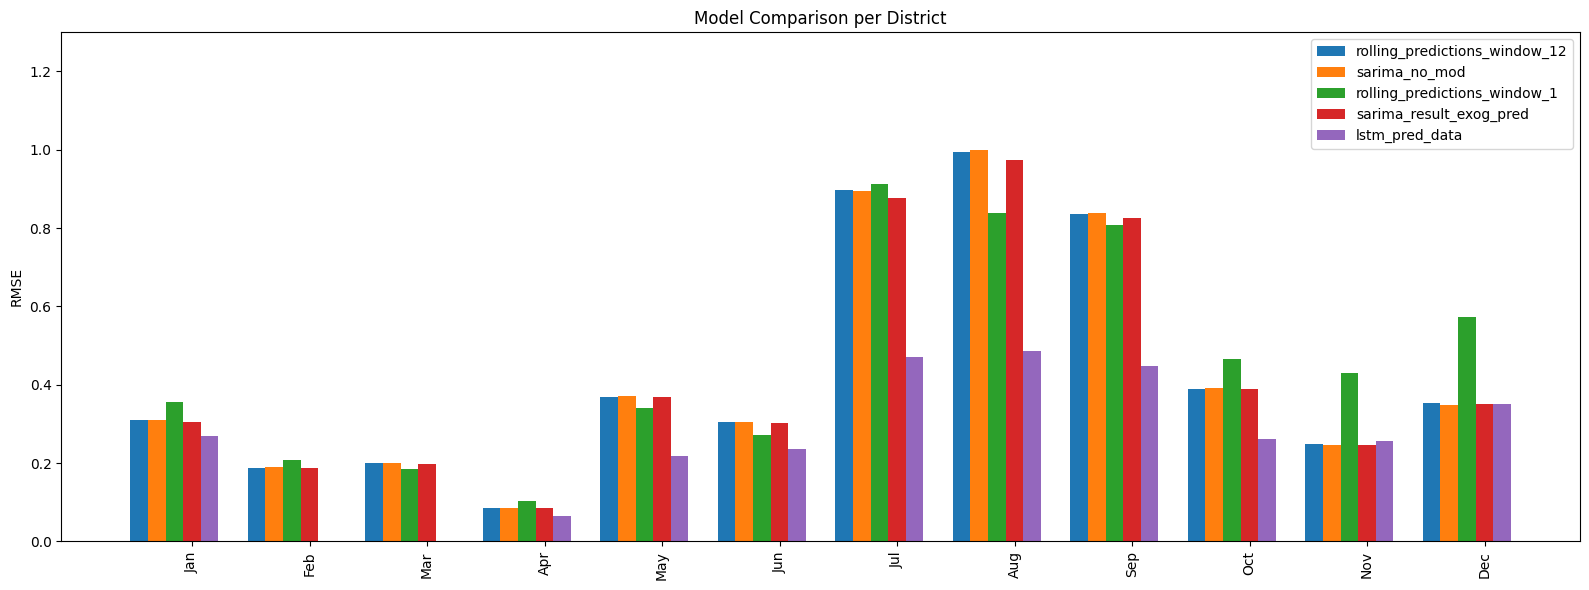

In [19]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Assuming your data is loaded into a DataFrame called df
# # If you haven't loaded it yet, load using:
# # df = pd.read_csv("your_file.csv", index_col=0)

# # Transpose for better plotting
# df = models_month_rmse # Columns become models, rows become districts
# df = 1/df  # Invert the values for better visualization (if needed)

# df = (df - df.min().min()) / (df.max().max() - df.min().min())

# # Plotting
# x = np.arange(len(df.index))  # Number of districts
# width = 0.15  # Width of each bar
# models = df.columns

# plt.figure(figsize=(16, 6))

# # Create bar for each model
# for i, model in enumerate(models):
#     plt.bar(x + i * width, df[model], width=width, label=model)

# plt.xticks(x + width * 2, df.index, rotation=90)
# plt.ylabel('RMSE')
# plt.title('Model Comparison per District')
# plt.ylim(0, 1.3)
# plt.legend()
# plt.tight_layout()
# plt.show()

plot_fig(models_month_rmse,True,'Model Comparison per District','RMSE')


### By seasons (6) wise

In [20]:
# month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
summer=['Apr', 'May', 'Jun']
Monsoon= ['Jun', 'Jul', 'Aug']
Autumn= ['Aug', 'Sep', 'Oct']
Early_Winter= ['Oct', 'Nov', 'Dec']
Winter=['Dec', 'Jan', 'Feb']
Spring=['Feb', 'Mar', 'Apr']

seasons={
    "Summer": summer,
    "Monsoon": Monsoon,
    "Autumn": Autumn,
    "Early_Winter": Early_Winter,
    "Winter": Winter,
    "Spring": Spring
}

In [21]:
seasons

{'Summer': ['Apr', 'May', 'Jun'],
 'Monsoon': ['Jun', 'Jul', 'Aug'],
 'Autumn': ['Aug', 'Sep', 'Oct'],
 'Early_Winter': ['Oct', 'Nov', 'Dec'],
 'Winter': ['Dec', 'Jan', 'Feb'],
 'Spring': ['Feb', 'Mar', 'Apr']}

In [22]:
models_rmse

{'rolling_predictions_window_12': {'Bankura_temp': {'Jan': 0.7112189933644307,
   'Feb': 0.7687783076322623,
   'Mar': 0.9438810567560131,
   'Apr': 1.0906954408670688,
   'May': 0.5385929823117155,
   'Jun': 1.0000644165097103,
   'Jul': 0.39925442866093386,
   'Aug': 0.3647133069575234,
   'Sep': 0.417841632842118,
   'Oct': 0.6347546837254222,
   'Nov': 0.8288564941562778,
   'Dec': 0.6031287831312147},
  'Birbhum_temp': {'Jan': 0.6866729158937395,
   'Feb': 0.7655126839744578,
   'Mar': 0.7949146863968483,
   'Apr': 0.974843257078293,
   'May': 0.461877086830418,
   'Jun': 0.8256081788401064,
   'Jul': 0.3882866956225559,
   'Aug': 0.40360786949111754,
   'Sep': 0.43274835578645704,
   'Oct': 0.598515886462841,
   'Nov': 0.6476156443985153,
   'Dec': 0.5930424066986216},
  'Burdwan_temp': {'Jan': 0.6808457984482517,
   'Feb': 0.7580177994091446,
   'Mar': 0.8517307028809659,
   'Apr': 1.027303702963232,
   'May': 0.4911399527883397,
   'Jun': 0.8411163938170787,
   'Jul': 0.3414478

In [23]:
X_axix= ['Summer', 'Monsoon', 'Autumn', 'Early_Winter', 'Winter', 'Spring']
summer=['Apr', 'May', 'Jun']
Monsoon= ['Jun', 'Jul', 'Aug']
Autumn= ['Aug', 'Sep', 'Oct']
Early_Winter= ['Oct', 'Nov', 'Dec']
Winter=['Dec', 'Jan', 'Feb']
Spring=['Feb', 'Mar', 'Apr']

seasons={
    "Summer": summer,
    "Monsoon": Monsoon,
    "Autumn": Autumn,
    "Early_Winter": Early_Winter,
    "Winter": Winter,
    "Spring": Spring
}

models_seasons_rmse= {}
for model_name, model_data in models_rmse.items():
    print(f"Model: {model_name}")
    x_rmse = {}
    for x in X_axix:
        sum =0
        denom =0
        for dist, rmse_value in model_data.items():
            # print(f"dist: {dist}")
            # print(mse_value[x])
            """"
            result_rmse= srt((rmse1^2* test_data_len + rmse2^2* test_data_len + rmse3^2* test_data_len)/test_data_len+test_data_len+test_data_len
            """
            sum_month = 0
            denom_month = 0
            # print(f"Season: {x}")
            month_rmse= 0
            for month in seasons[x]:
                # print(f"Month: {month}")
                # print(rmse_value[month])
                sum_month += (rmse_value[month]**2)*test_data_len 
                denom_month+= test_data_len
            
            month_rmse = (sum_month/denom_month)**0.5
            sum += month_rmse**2 * test_data_len*len(seasons[x])
            denom += test_data_len*len(seasons[x])
        x_rmse[x] = (sum/denom)**0.5
    models_seasons_rmse[model_name] = x_rmse
        
    

Model: rolling_predictions_window_12
Model: sarima_no_mod
Model: rolling_predictions_window_1
Model: sarima_result_exog_pred
Model: lstm_pred_data


In [24]:
models_seasons_rmse= pd.DataFrame(models_seasons_rmse)

In [25]:
from ast import mod


models_seasons_rmse.T


,Summer,Monsoon,Autumn,Early_Winter,Winter,Spring
rolling_predictions_window_12,0.843868,0.529902,0.500053,0.717419,0.771389,0.941998
sarima_no_mod,0.842817,0.529935,0.498994,0.720364,0.772615,0.941313
rolling_predictions_window_1,0.845852,0.557661,0.490906,0.588450,0.703375,0.925019
sarima_result_exog_pred,0.844890,0.533612,0.502182,0.720056,0.773724,0.943585
lstm_pred_data,0.932671,0.675035,0.667224,0.757305,0.956279,1.233521


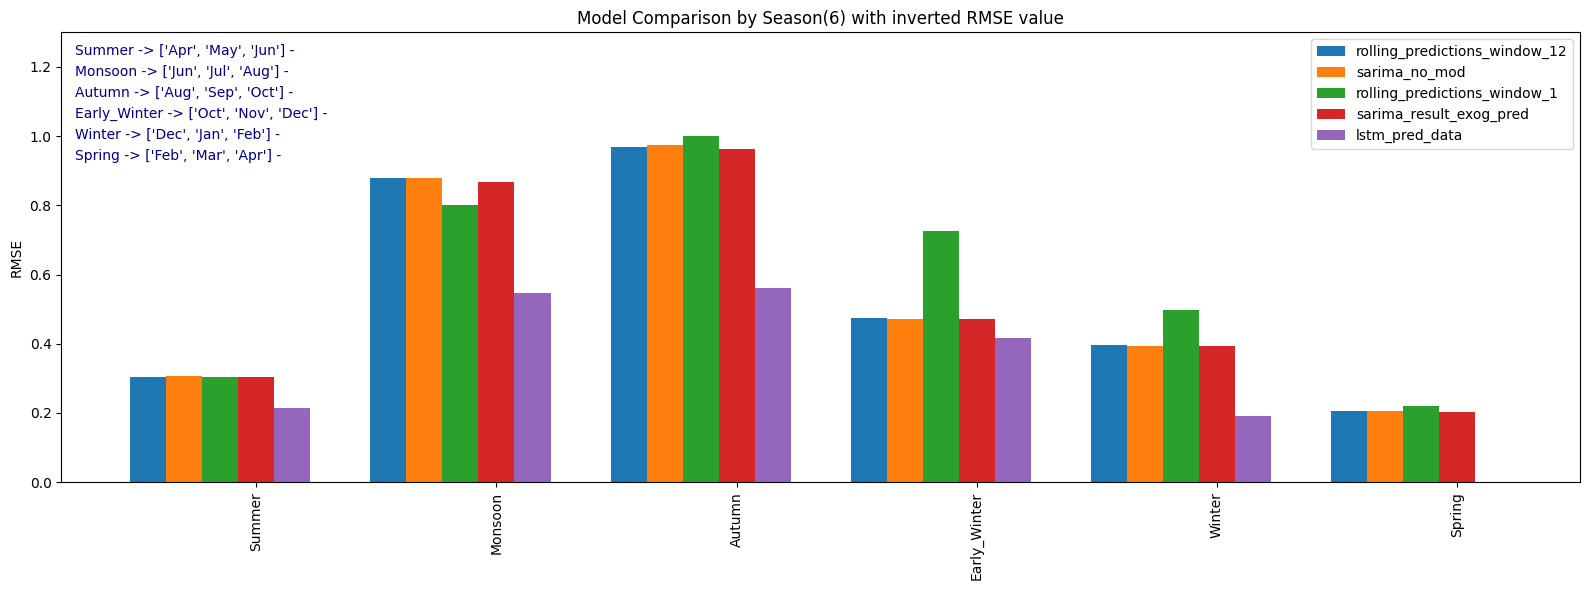

In [26]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Assuming your data is loaded into a DataFrame called df
# # If you haven't loaded it yet, load using:
# # df = pd.read_csv("your_file.csv", index_col=0)

# # Transpose for better plotting
# df = models_seasons_rmse # Columns become models, rows become districts
# df = 1/df  # Invert the values for better visualization (if needed)

# df = (df - df.min().min()) / (df.max().max() - df.min().min())

# # Plotting
# x = np.arange(len(df.index))  # Number of districts
# width = 0.15  # Width of each bar
# models = df.columns

# plt.figure(figsize=(16, 6))

# # Create bar for each model
# for i, model in enumerate(models):
#     plt.bar(x + i * width, df[model], width=width, label=model)

# plt.xticks(x + width * 2, df.index, rotation=90)
# plt.ylabel('RMSE')
# plt.title('Model Comparison per District')
# plt.ylim(0, 1.3)
# plt.legend()
# y_pos = 0.9
# for s,data in seasons.items():
    
#     plt.figtext(0.05, y_pos, f"{s} -> {data} -" ,
#             fontsize=10, color='darkblue', ha='left')
#     y_pos -= 0.035  # Adjust the position for the next season text

# plt.tight_layout()
# plt.show()

plot_fig(models_seasons_rmse,True,"Model Comparison by Season(6) with inverted RMSE value",'RMSE',seasons=seasons)


### By seasons (4) wise

In [27]:
X_axix= ['Summer', 'Monsoon', 'Autumn', 'Winter']
summer=['Mar','Apr', 'May', 'Jun']
Monsoon= ['Jun', 'Jul', 'Aug','Sep']
Autumn= ['Oct', 'Nov']
Winter=['Dec', 'Jan', 'Feb']
seasons={
    "Summer": summer,
    "Monsoon": Monsoon,
    "Autumn": Autumn,
    "Winter": Winter,
}

models_seasons_rmse= {}
for model_name, model_data in models_rmse.items():
    print(f"Model: {model_name}")
    x_rmse = {}
    for x in X_axix:
        sum =0
        denom =0
        for dist, rmse_value in model_data.items():
            # print(f"dist: {dist}")
            # print(mse_value[x])
            """"
            result_rmse= srt((rmse1^2* test_data_len + rmse2^2* test_data_len + rmse3^2* test_data_len)/test_data_len+test_data_len+test_data_len
            """
            sum_month = 0
            denom_month = 0
            # print(f"Season: {x}")
            month_rmse= 0
            for month in seasons[x]:
                # print(f"Month: {month}")
                # print(rmse_value[month])
                sum_month += (rmse_value[month]**2)*test_data_len 
                denom_month+= test_data_len
            
            month_rmse = (sum_month/denom_month)**0.5
            sum += month_rmse**2 * test_data_len*len(seasons[x])
            denom += test_data_len*len(seasons[x])
        x_rmse[x] = (sum/denom)**0.5
    models_seasons_rmse[model_name] = x_rmse
models_seasons_rmse= pd.DataFrame(models_seasons_rmse)
models_seasons_rmse.T

Model: rolling_predictions_window_12
Model: sarima_no_mod
Model: rolling_predictions_window_1
Model: sarima_result_exog_pred
Model: lstm_pred_data


,Summer,Monsoon,Autumn,Winter
rolling_predictions_window_12,0.848951,0.504990,0.731446,0.771389
sarima_no_mod,0.848350,0.504800,0.733426,0.772615
rolling_predictions_window_1,0.856365,0.528782,0.613445,0.703375
sarima_result_exog_pred,0.850714,0.508503,0.733987,0.773724
lstm_pred_data,1.033215,0.660041,0.788006,0.956279


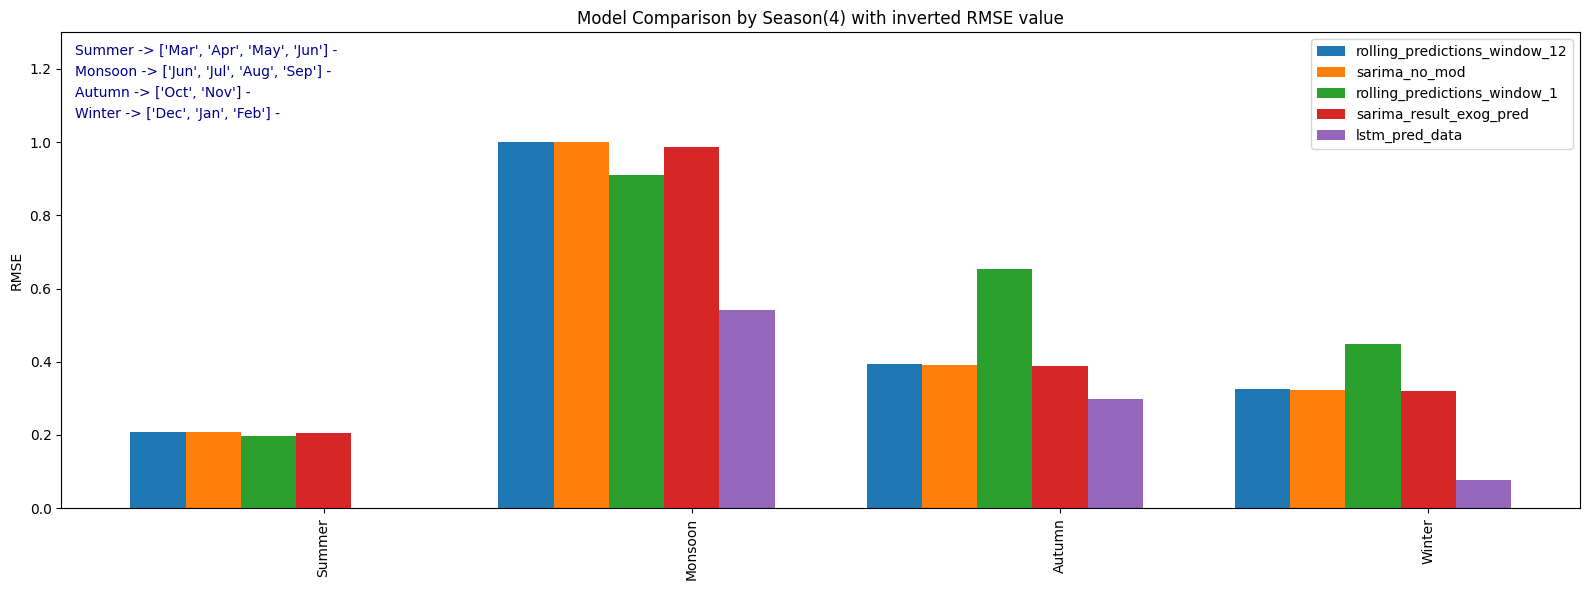

In [28]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Assuming your data is loaded into a DataFrame called df
# # If you haven't loaded it yet, load using:
# # df = pd.read_csv("your_file.csv", index_col=0)

# # Transpose for better plotting
# df = models_seasons_rmse # Columns become models, rows become districts
# df = 1/df  # Invert the values for better visualization (if needed)

# df = (df - df.min().min()) / (df.max().max() - df.min().min())

# # Plotting
# x = np.arange(len(df.index))  # Number of districts
# width = 0.15  # Width of each bar
# models = df.columns

# plt.figure(figsize=(16, 6))

# # Create bar for each model
# for i, model in enumerate(models):
#     plt.bar(x + i * width, df[model], width=width, label=model)

# plt.xticks(x + width * 2, df.index, rotation=90)
# plt.ylabel('RMSE')
# plt.title('Model Comparison per District')
# # plt.ylim(0, 1.3)
# plt.legend()
# y_pos = 0.9
# for s,data in seasons.items():
    
#     plt.figtext(0.05, y_pos, f"{s} -> {data} -" ,
#             fontsize=10, color='darkblue', ha='left')
#     y_pos -= 0.035  # Adjust the position for the next season text

# plt.tight_layout()
# plt.show()

plot_fig(models_seasons_rmse,True,"Model Comparison by Season(4) with inverted RMSE value",'RMSE',seasons=seasons)


## prediction place wise 

In [29]:
# from sklearn.metrics import r2_score
from sympy import im

def r2_score(y_true, y_pred):
    # manually calculate R2 score
    ss_res = ((y_true - y_pred) ** 2).sum()
    ss_tot = ((y_true - y_true.mean()) ** 2).sum()
    r2 = 1 - (ss_res / ss_tot)
    return r2

def find_r2(y_true, y_pred):
    r2_val={}
    for col in y_true:
        r2_val[col]=r2_score(y_true[col], y_pred[col])
    return r2_val

models_r2={}
for model_name, model_data in models.items():
    models_r2[model_name]=find_r2(test_data,model_data)

In [30]:
models_r2 = pd.DataFrame(models_r2)

In [31]:
models_r2.T

,Bankura_temp,Birbhum_temp,Burdwan_temp,Darjeeling_temp,Hooghly_temp,Howrah_temp,Jalpaiguri_temp,Kochbihar_temp,Kolkata_temp,Malda_temp,Medinipur_temp,Murshidabad_temp,Nadia_temp,North-24-Parganas_temp,North-Dinajpur_temp,Purulia_temp,South-24-Parganas_temp,South-Dinajpur_temp
rolling_predictions_window_12,0.971807,0.977260,0.975146,0.956774,0.969577,0.966679,0.951852,0.964423,0.967160,0.971796,0.967636,0.974432,0.971621,0.964258,0.973248,0.968801,0.962647,0.966450
sarima_no_mod,0.971878,0.977075,0.975131,0.958285,0.969722,0.966656,0.955873,0.958888,0.967004,0.972995,0.967580,0.974473,0.971658,0.964196,0.971667,0.968473,0.961608,0.967463
rolling_predictions_window_1,0.972392,0.977105,0.974935,0.965466,0.969362,0.966613,0.965401,0.969611,0.966497,0.975913,0.969554,0.975681,0.972514,0.964426,0.976333,0.970066,0.962112,0.972287
sarima_result_exog_pred,0.971626,0.977233,0.974975,0.962365,0.969501,0.966945,0.951516,0.957392,0.967437,0.971903,0.964630,0.974531,0.971851,0.963233,0.972170,0.969107,0.961608,0.968258
lstm_pred_data,0.918178,0.972487,0.963770,0.926724,0.927174,0.954763,0.953847,0.963461,0.948579,0.951939,0.951983,0.965280,0.959257,0.952491,0.970582,0.964948,0.906247,0.960140


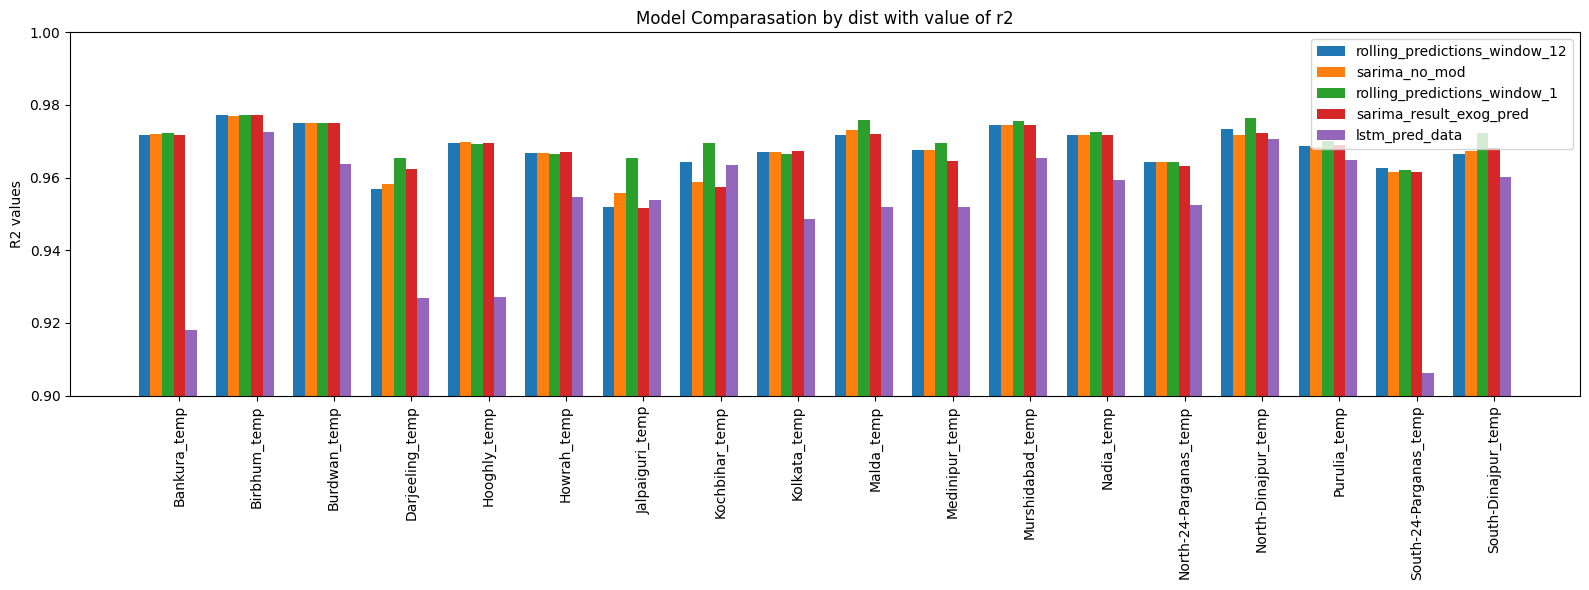

In [32]:
plot_fig(models_r2,False,"Model Comparasation by dist with value of r2","R2 values",ylim=[.9,1])